In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/jose-a-osuna/Documents/Platzi/fetal_health.csv")

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
matriz_corr = data.corr()

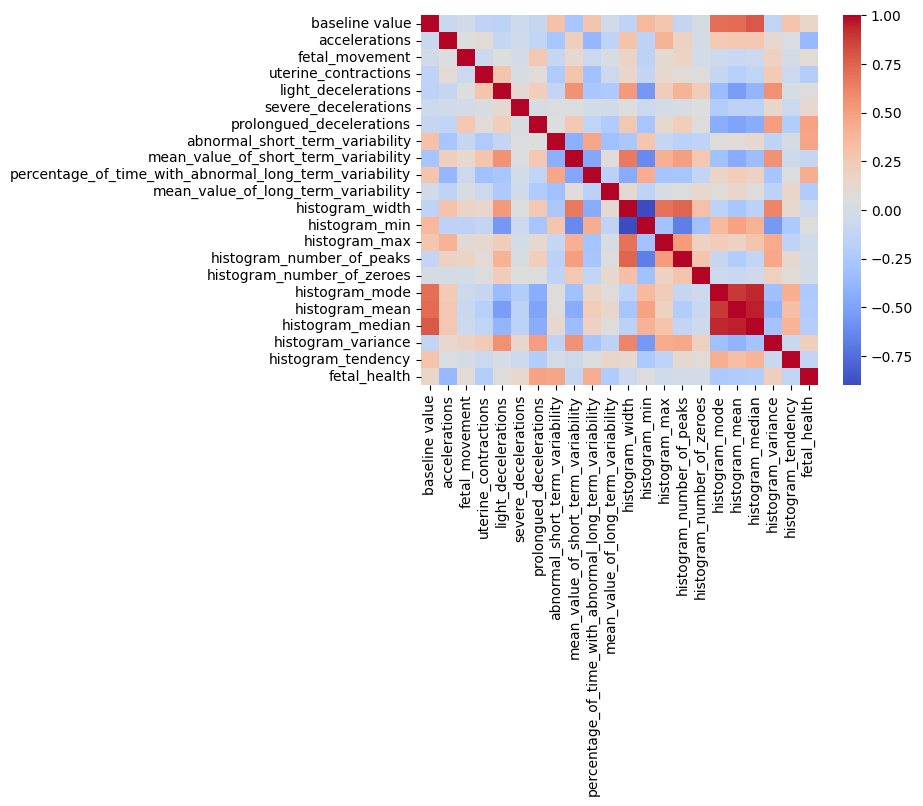

In [5]:
sns.heatmap(matriz_corr, cmap='coolwarm')
plt.show()

In [6]:
data["fetal_health"] = data["fetal_health"].astype(int)

In [7]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


In [8]:
normal = data["fetal_health"] == 1
suspect = data["fetal_health"] == 2
pathological = data["fetal_health"] == 3

In [9]:
normal
suspect
pathological

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Name: fetal_health, Length: 2126, dtype: bool

In [10]:
sum_normal = sum(normal)
sum_normal

1655

In [11]:
sum_suspect = sum(suspect)
sum_suspect

295

In [12]:
sum_patho = sum(pathological)
sum_patho

176

In [13]:
f_health = [sum_normal, sum_suspect, sum_patho]


In [14]:
total = sum_normal + sum_suspect + sum_patho

In [15]:
data_health = pd.DataFrame(f_health)

In [16]:
labels_fh = ["normal", "suspect", "pathological"]

In [17]:
colores = ["blue", "orange", "red"]

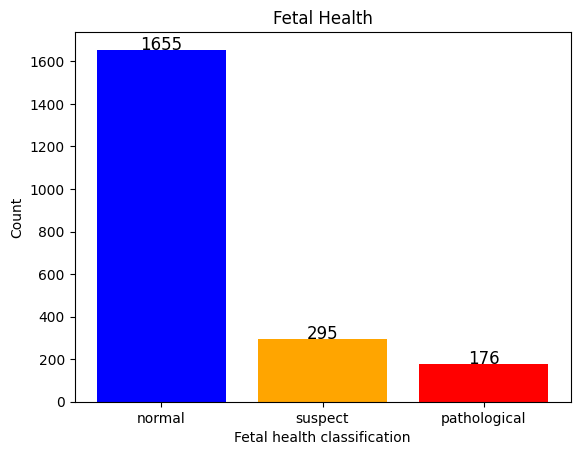

In [18]:
plt.bar(labels_fh, f_health, color=colores)
for i, v in enumerate(f_health):
    plt.text(i, v + 0.5, str(v), ha="center", fontsize=12)
plt.title("Fetal Health")
plt.xlabel("Fetal health classification")
plt.ylabel("Count")
plt.show()

In [19]:
normal_percent = (f_health[0] / total) * 100
round(normal_percent)

78

In [20]:
suspect_percent = (f_health[1] / total) * 100
round(suspect_percent)

14

In [21]:
patho_percent = (f_health[2] / total) * 100
round(patho_percent)

8

In [22]:
promedio_referencia = np.mean(data["baseline value"])
promedio_referencia

133.3038570084666

In [23]:
mediana_referencia = np.median(data["baseline value"])
mediana_referencia

133.0

In [24]:
np.mean(data["accelerations"])

0.00317826904985889

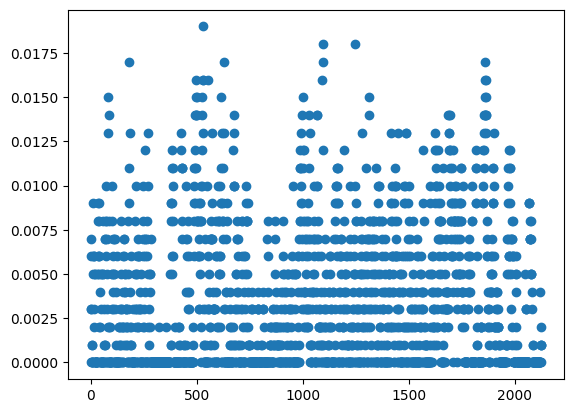

In [25]:
plt.plot(data["accelerations"], "o")
plt.show()

In [26]:
data_acc1 = data[data["fetal_health"] == 1]

In [27]:
np.mean(data_acc1["accelerations"])

0.003992145015105741

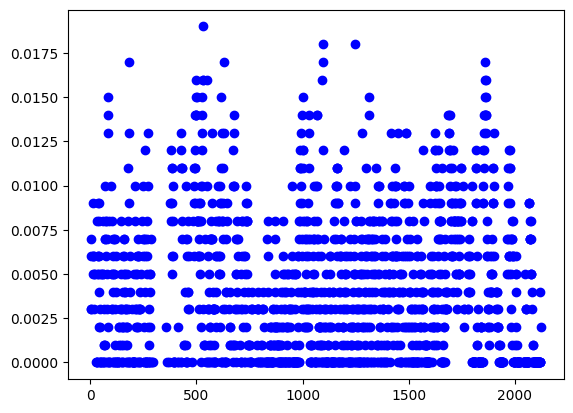

In [28]:
plt.plot(data_acc1["accelerations"],"o", color="blue")
plt.show()

In [29]:
data_acc2 = data[data["fetal_health"] == 2]

In [30]:
np.mean(data_acc2["accelerations"])

0.0002745762711864407

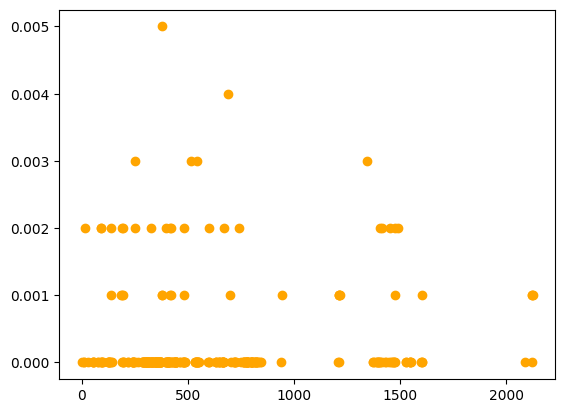

In [31]:
plt.plot(data_acc2["accelerations"],"o", color="orange")
plt.show()

In [32]:
data_acc3 = data[data["fetal_health"] == 3]
np.mean(data_acc3["accelerations"])

0.0003920454545454546

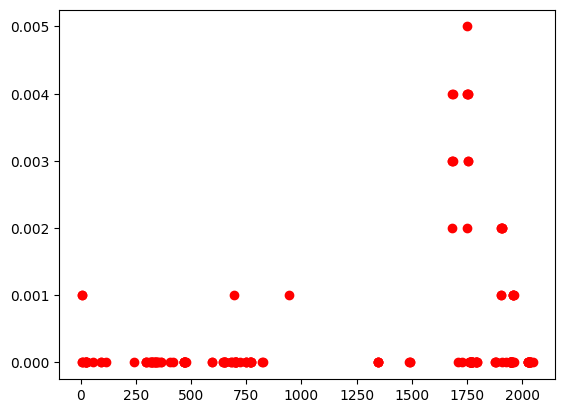

In [33]:
plt.plot(data_acc3["accelerations"],"o", color="red")
plt.show()

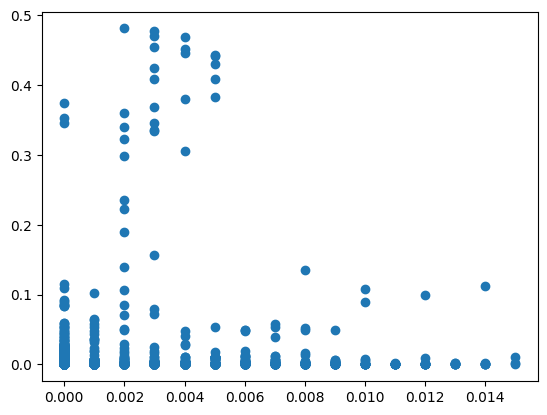

In [34]:
plt.scatter(data["light_decelerations"], data["fetal_movement"])
plt.show()

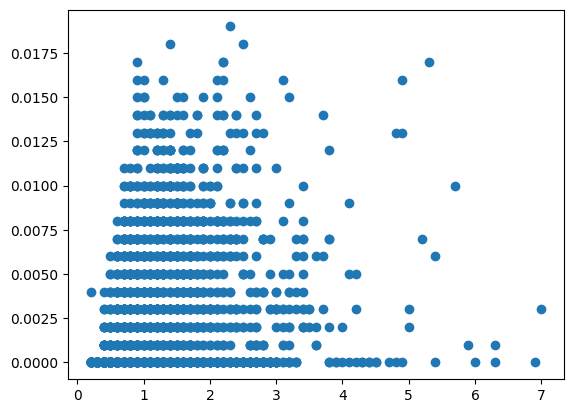

In [35]:
plt.plot(data["mean_value_of_short_term_variability"], data["accelerations"], "o")
plt.show()

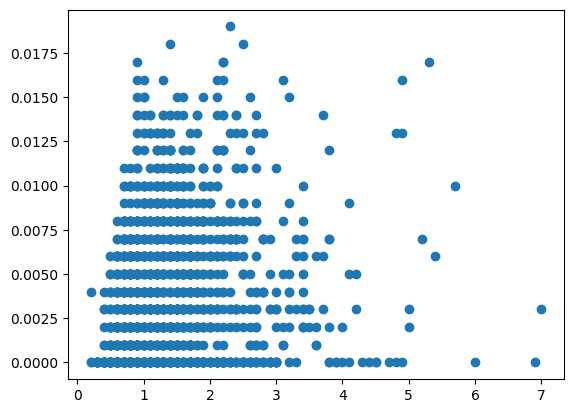

In [36]:
plt.plot(data_acc1["mean_value_of_short_term_variability"], data_acc1["accelerations"], "o")
plt.show()

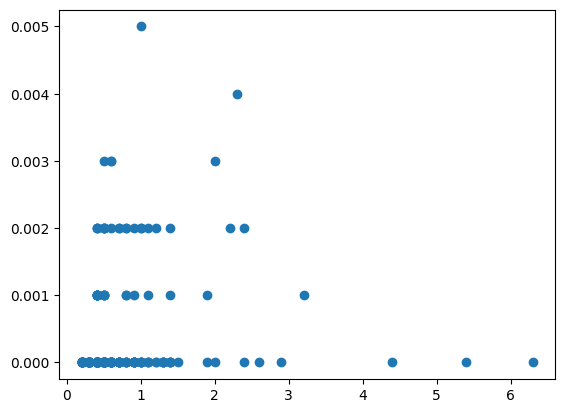

In [37]:
plt.plot(data_acc2["mean_value_of_short_term_variability"], data_acc2["accelerations"], "o")
plt.show()

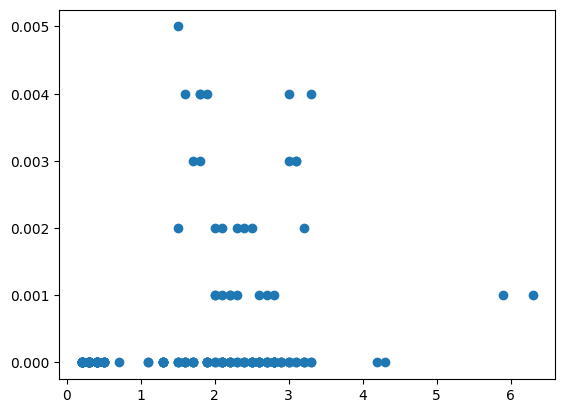

In [38]:
plt.plot(data_acc3["mean_value_of_short_term_variability"], data_acc3["accelerations"], "o")
plt.show()

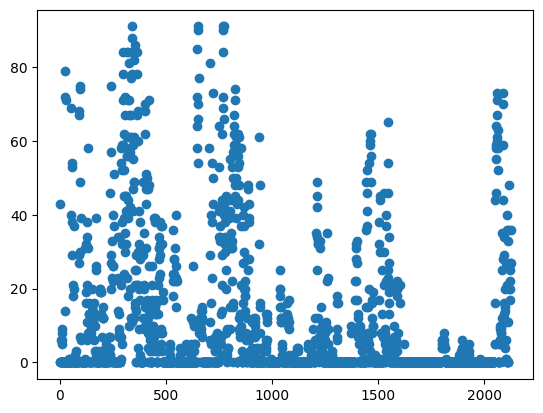

In [39]:
plt.plot(data["percentage_of_time_with_abnormal_long_term_variability"],"o")
plt.show()

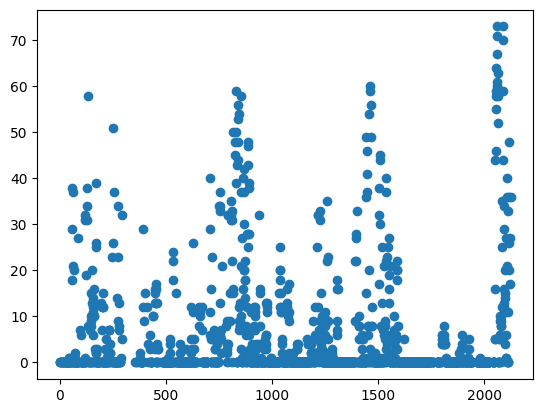

In [40]:
plt.plot(data_acc1["percentage_of_time_with_abnormal_long_term_variability"],"o")
plt.show()

In [41]:
np.mean(data_acc1["percentage_of_time_with_abnormal_long_term_variability"])

5.044712990936556

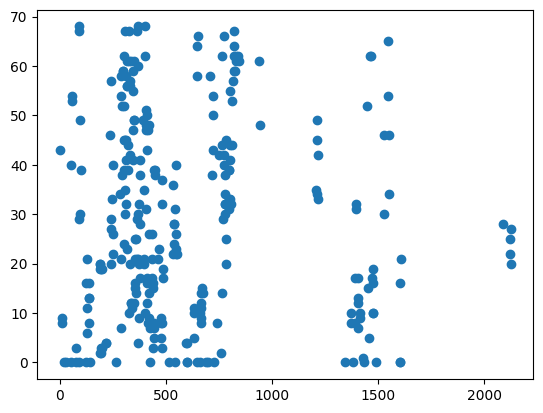

In [42]:
plt.plot(data_acc2["percentage_of_time_with_abnormal_long_term_variability"],"o")
plt.show()

In [43]:
np.mean(data_acc2["percentage_of_time_with_abnormal_long_term_variability"])

29.030508474576273

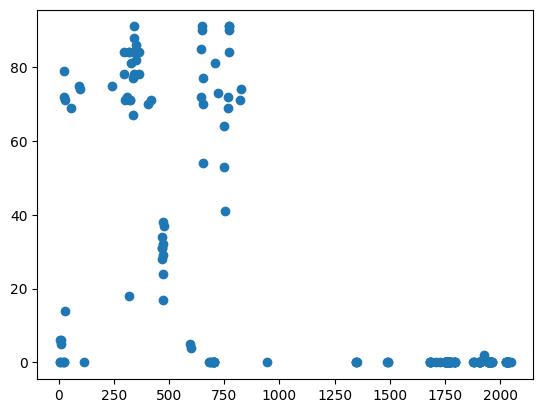

In [44]:
plt.plot(data_acc3["percentage_of_time_with_abnormal_long_term_variability"],"o")
plt.show()

In [45]:
np.mean(data_acc3["percentage_of_time_with_abnormal_long_term_variability"])

22.84659090909091

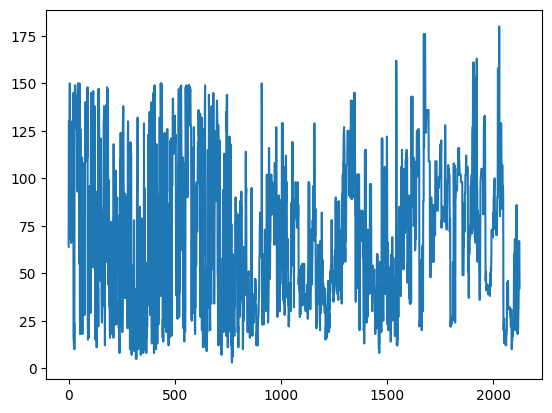

In [46]:
plt.plot(data["histogram_width"])
plt.show()

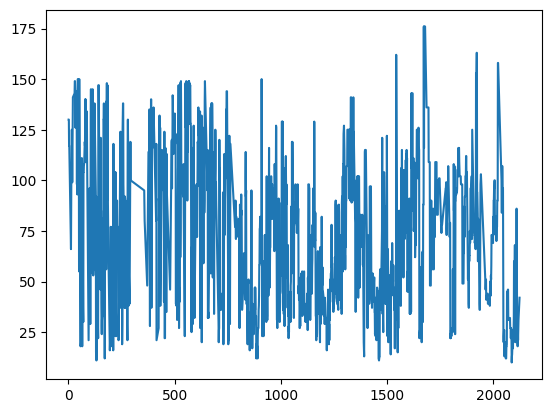

In [47]:
plt.plot(data_acc1["histogram_width"])
plt.show()

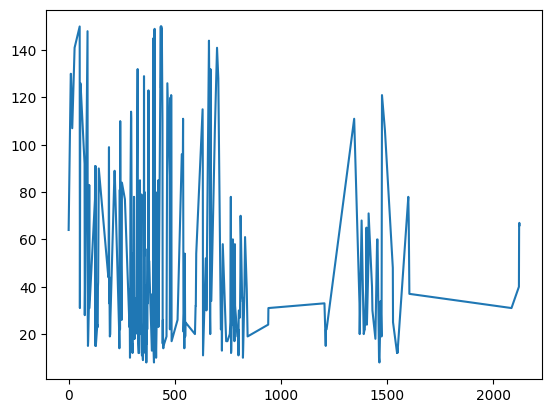

In [48]:
plt.plot(data_acc2["histogram_width"])
plt.show()

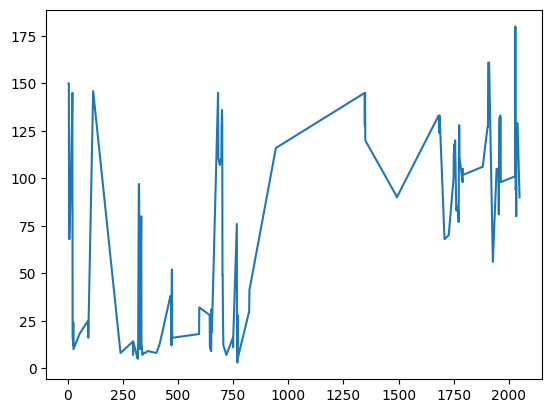

In [49]:
plt.plot(data_acc3["histogram_width"])
plt.show()